!["corn field"](Images/corn-field-861x574.jpg)
Photo by <a href="https://martinvorel.com/">Martin Vorel</a>

In [69]:
from random import gauss as gs
import pandas as pd
import numpy as np
from datetime import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit

import itertools

#statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

%matplotlib inline

In [70]:
df = pd.read_csv('Data/Jamestown_weather_2002-current.csv', index_col="Date", parse_dates=True)

In [71]:
df.head()

,MaxTemp,MaxTempMissing,MaxTempEstimated,MinTemp,MinTempMissing,MinTempEstimated,AvgTemp,AvgTempMissing,AvgTempEstimated,AvgBareSoilTemp_F,...,AvgPenmanPETEstimated,TotalRainfall_inch,TotalRainfallMissing,TotalRainfallEstimated,AvgDewPoint_F,AvgDewPointMissing,AvgDewPointEstimated,AvgWindChill_F,AvgWindChillMissing,AvgWindChillEstimated
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-01,27.303,0,0,9.467,0,0,18.385,0,0,27.933,...,0,NaN,7,0,13.858,0,0,7.459,0,0
2002-01-08,39.815,0,0,25.948,0,0,32.882,0,0,31.238,...,0,NaN,7,0,25.456,0,0,23.226,0,0
2002-01-15,23.837,0,0,2.848,0,0,13.342,0,0,27.270,...,0,NaN,7,0,8.138,0,0,1.728,0,0
2002-01-22,21.085,0,0,3.847,0,0,12.466,0,0,24.517,...,0,NaN,7,0,6.820,0,0,-0.195,0,0
2002-01-29,19.566,0,0,-6.088,0,0,6.739,0,0,23.631,...,0,NaN,7,0,1.558,0,0,-3.079,0,0


In [72]:
df.describe()

,MaxTemp,MaxTempMissing,MaxTempEstimated,MinTemp,MinTempMissing,MinTempEstimated,AvgTemp,AvgTempMissing,AvgTempEstimated,AvgBareSoilTemp_F,...,AvgPenmanPETEstimated,TotalRainfall_inch,TotalRainfallMissing,TotalRainfallEstimated,AvgDewPoint_F,AvgDewPointMissing,AvgDewPointEstimated,AvgWindChill_F,AvgWindChillMissing,AvgWindChillEstimated
count,1145.000000,1145.0,1145.000000,1145.000000,1145.0,1145.000000,1145.000000,1145.0,1145.000000,1145.000000,...,1145.000000,709.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000
mean,52.011427,0.0,0.029694,30.617717,0.0,0.039301,41.314720,0.0,0.040175,47.079124,...,0.001747,0.538072,2.779913,0.047162,32.574510,0.000873,0.053275,35.287160,0.000873,0.120524
std,23.982678,0.0,0.319788,21.321530,0.0,0.343816,22.536766,0.0,0.344984,17.618752,...,0.041776,0.807818,3.383234,0.425841,20.498662,0.029553,0.376019,28.037747,0.029553,0.592322
min,-6.841000,0.0,0.000000,-24.039000,0.0,0.000000,-15.440000,0.0,0.000000,17.738000,...,0.000000,0.000000,0.000000,0.000000,-23.987000,0.000000,0.000000,-34.988000,0.000000,0.000000
25%,31.172000,0.0,0.000000,14.233000,0.0,0.000000,23.063000,0.0,0.000000,31.019000,...,0.000000,0.024000,0.000000,0.000000,17.918000,0.000000,0.000000,12.845000,0.000000,0.000000
50%,55.395000,0.0,0.000000,31.627000,0.0,0.000000,43.737000,0.0,0.000000,43.522000,...,0.000000,0.223000,0.000000,0.000000,32.173000,0.000000,0.000000,38.237000,0.000000,0.000000
75%,74.249000,0.0,0.000000,50.753000,0.0,0.000000,62.393000,0.0,0.000000,64.262000,...,0.000000,0.741000,7.000000,0.000000,52.095000,0.000000,0.000000,62.088000,0.000000,0.000000
max,94.946000,0.0,7.000000,64.421000,0.0,7.000000,77.270000,0.0,7.000000,81.941000,...,1.000000,8.004000,7.000000,7.000000,67.721000,1.000000,7.000000,77.464000,1.000000,7.000000


In [73]:
df.isna().sum()

MaxTemp                       0
MaxTempMissing                0
MaxTempEstimated              0
MinTemp                       0
MinTempMissing                0
MinTempEstimated              0
AvgTemp                       0
AvgTempMissing                0
AvgTempEstimated              0
AvgBareSoilTemp_F             0
AvgBareSoilTempMissing        0
AvgBareSoilTempEstimated      0
AvgTurfSoilTemp_F             0
AvgTurfSoilTempMissing        0
AvgTurfSoilTempEstimated      0
AvgWindSpeed                  0
AvgWindSpeedMissing           0
AvgWindSpeedEstimated         0
MaxWindSpeed                  0
MaxWindSpeedMissing           0
MaxWindSpeedEstimated         0
TotalSolarRad_Lys             0
TotalSolarRadMissing          0
TotalSolarRadEstimated        0
TotalPenmanPET_inch           0
TotalPenmanPETMissing         0
TotalPenmanPETEstimated       0
AvgPenmanPET_inch             0
AvgPenmanPETMissing           0
AvgPenmanPETEstimated         0
TotalRainfall_inch          436
TotalRai

In [74]:
df.sum()

MaxTemp                      59553.084
MaxTempMissing                   0.000
MaxTempEstimated                34.000
MinTemp                      35057.286
MinTempMissing                   0.000
MinTempEstimated                45.000
AvgTemp                      47305.354
AvgTempMissing                   0.000
AvgTempEstimated                46.000
AvgBareSoilTemp_F            53905.597
AvgBareSoilTempMissing           0.000
AvgBareSoilTempEstimated        73.000
AvgTurfSoilTemp_F            51640.836
AvgTurfSoilTempMissing           1.000
AvgTurfSoilTempEstimated       186.000
AvgWindSpeed                 11091.380
AvgWindSpeedMissing              0.000
AvgWindSpeedEstimated          126.000
MaxWindSpeed                 27494.377
MaxWindSpeedMissing              0.000
MaxWindSpeedEstimated           99.000
TotalSolarRad_Lys           376892.506
TotalSolarRadMissing             0.000
TotalSolarRadEstimated          57.000
TotalPenmanPET_inch           1090.718
TotalPenmanPETMissing    

In [75]:
df_temps = df[["MaxTemp", "MaxTempMissing", "MaxTempEstimated", "MinTemp", "MinTempMissing", "MinTempEstimated", "AvgTemp", "AvgTempMissing", "AvgTempEstimated", "AvgBareSoilTemp_F", "AvgBareSoilTempMissing", "AvgBareSoilTempEstimated", "AvgTurfSoilTemp_F", "AvgTurfSoilTempMissing", "AvgTurfSoilTempEstimated"]]

In [76]:
df_temps.head()

,MaxTemp,MaxTempMissing,MaxTempEstimated,MinTemp,MinTempMissing,MinTempEstimated,AvgTemp,AvgTempMissing,AvgTempEstimated,AvgBareSoilTemp_F,AvgBareSoilTempMissing,AvgBareSoilTempEstimated,AvgTurfSoilTemp_F,AvgTurfSoilTempMissing,AvgTurfSoilTempEstimated
Date,,,,,,,,,,,,,,,
2002-01-01,27.303,0,0,9.467,0,0,18.385,0,0,27.933,0,0,29.125,0,0
2002-01-08,39.815,0,0,25.948,0,0,32.882,0,0,31.238,0,0,31.925,0,0
2002-01-15,23.837,0,0,2.848,0,0,13.342,0,0,27.270,0,0,29.438,0,0
2002-01-22,21.085,0,0,3.847,0,0,12.466,0,0,24.517,0,0,27.567,0,0
2002-01-29,19.566,0,0,-6.088,0,0,6.739,0,0,23.631,0,0,24.934,0,0


In [77]:
df_temps.sum()

MaxTemp                     59553.084
MaxTempMissing                  0.000
MaxTempEstimated               34.000
MinTemp                     35057.286
MinTempMissing                  0.000
MinTempEstimated               45.000
AvgTemp                     47305.354
AvgTempMissing                  0.000
AvgTempEstimated               46.000
AvgBareSoilTemp_F           53905.597
AvgBareSoilTempMissing          0.000
AvgBareSoilTempEstimated       73.000
AvgTurfSoilTemp_F           51640.836
AvgTurfSoilTempMissing          1.000
AvgTurfSoilTempEstimated      186.000
dtype: float64

In [78]:
df_temps[df_temps["AvgTurfSoilTempMissing"]==1]

,MaxTemp,MaxTempMissing,MaxTempEstimated,MinTemp,MinTempMissing,MinTempEstimated,AvgTemp,AvgTempMissing,AvgTempEstimated,AvgBareSoilTemp_F,AvgBareSoilTempMissing,AvgBareSoilTempEstimated,AvgTurfSoilTemp_F,AvgTurfSoilTempMissing,AvgTurfSoilTempEstimated
Date,,,,,,,,,,,,,,,
2005-08-02,85.172,0,0,57.475,0,0,71.324,0,0,73.666,0,0,67.224,1,0


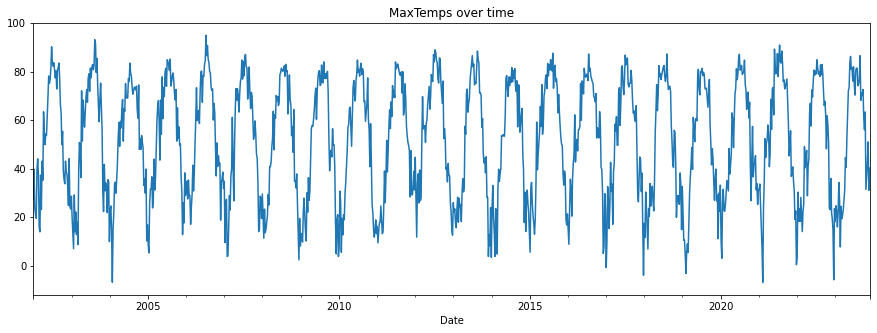

In [256]:
fig, ax = plt.subplots(figsize=(15, 5))
df_temps["MaxTemp"].plot(ax=ax)
ax.set_title("MaxTemps over time");

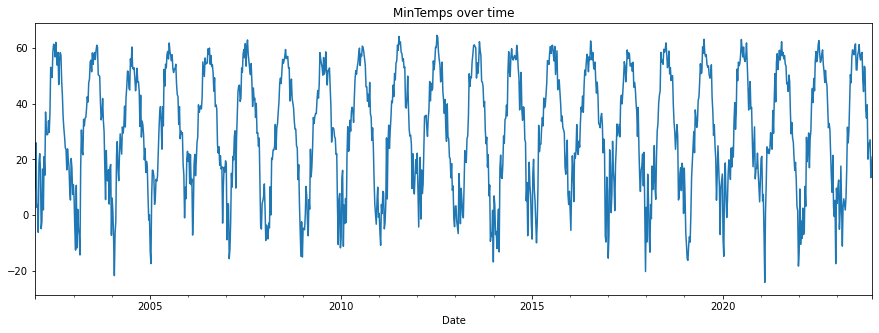

In [80]:
fig, ax = plt.subplots(figsize=(15, 5))
df_temps["MinTemp"].plot(ax=ax)
ax.set_title("MinTemps over time");

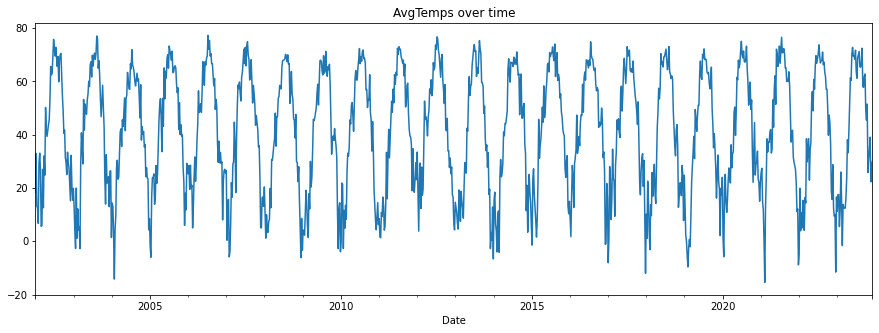

In [81]:
fig, ax = plt.subplots(figsize=(15, 5))
df_temps["AvgTemp"].plot(ax=ax)
ax.set_title("AvgTemps over time");

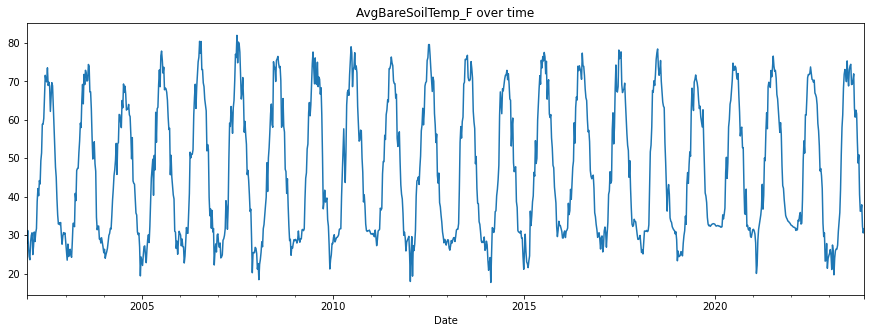

In [82]:
fig, ax = plt.subplots(figsize=(15, 5))
df_temps["AvgBareSoilTemp_F"].plot(ax=ax)
ax.set_title("AvgBareSoilTemp_F over time");

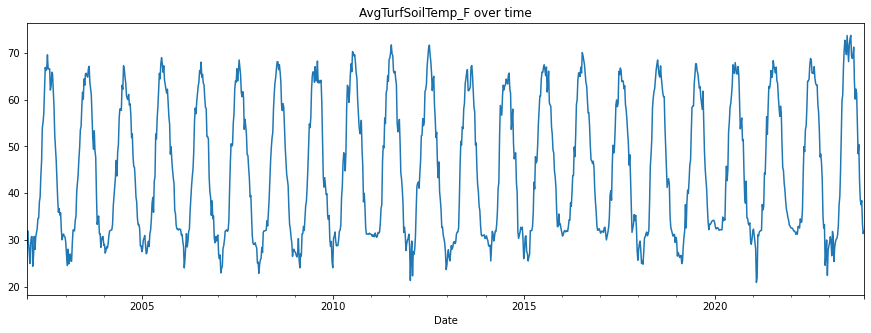

In [83]:
fig, ax = plt.subplots(figsize=(15, 5))
df_temps["AvgTurfSoilTemp_F"].plot(ax=ax)
ax.set_title("AvgTurfSoilTemp_F over time");

In [84]:
df_num = df_temps[["MaxTemp", "MinTemp", "AvgTemp", "AvgBareSoilTemp_F", "AvgTurfSoilTemp_F"]]

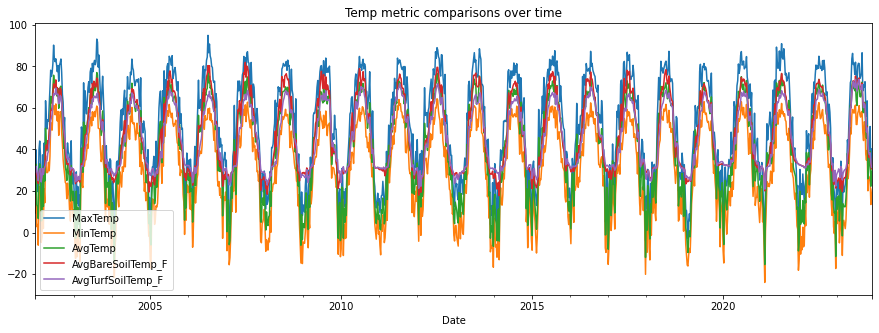

In [85]:
fig, ax = plt.subplots(figsize=(15, 5))
df_num.plot(ax=ax)
ax.set_title("Temp metric comparisons over time");

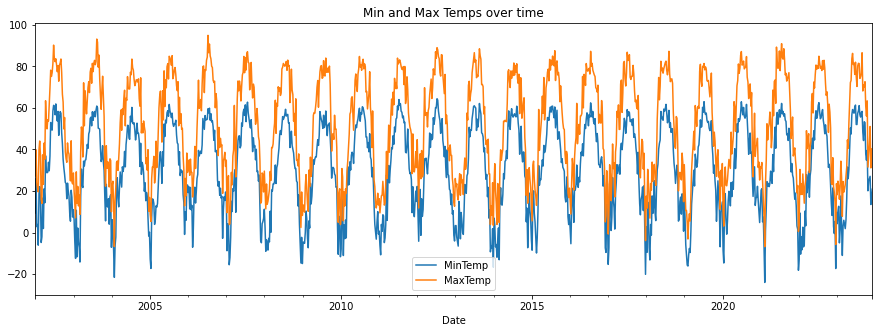

In [253]:
fig, ax = plt.subplots(figsize=(15, 5))
df_num[["MinTemp", "MaxTemp"]].plot(ax=ax)
ax.set_title("Min and Max Temps over time");

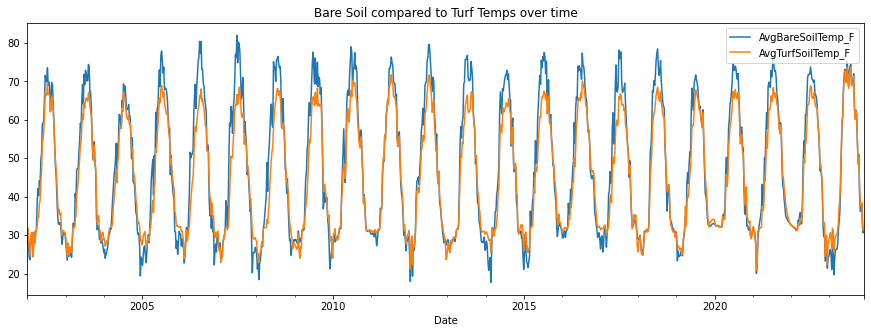

In [87]:
fig, ax = plt.subplots(figsize=(15, 5))
df_num[["AvgBareSoilTemp_F", "AvgTurfSoilTemp_F"]].plot(ax=ax)
ax.set_title("Bare Soil compared to Turf Temps over time");

Growing degree day (GDD) accumulations, rather than calendar days, more precisely characterize the length of the growing season. Unlike the number of days between killing frosts, GGDs provide quantitative information about temperature during the growing season. In calculating GDDs for corn, temperatures from a lower limit of 50 degrees and an upper limit of 86 degrees are accumulated for the growing season by applying the formula below to each day’s maximum and minimum temperatures:

Corn GDD=(Maximum temperature + minimum temperature)/2 - 50

Maximum temperatures higher than 86 degrees are entered as 86 and temperatures below 50 degrees are entered as 50 in the formula. GDDs are accumulated from seedling emergence until physiological maturity. Historical and current season GGD accumulations can be obtained from the North Dakota State University NDAWN weather site at https://ndawn.ndsu.nodak.edu/corn-growing-degree-days.html.

GDD accumulations (normal values) for May 1 to Oct. 1

In [88]:
df_num["GDD"] = (df["MaxTemp"]+df["MinTemp"])/2 - 50

In [89]:
df_num.head()

,MaxTemp,MinTemp,AvgTemp,AvgBareSoilTemp_F,AvgTurfSoilTemp_F,GDD
Date,,,,,,
2002-01-01,27.303,9.467,18.385,27.933,29.125,-31.6150
2002-01-08,39.815,25.948,32.882,31.238,31.925,-17.1185
2002-01-15,23.837,2.848,13.342,27.270,29.438,-36.6575
2002-01-22,21.085,3.847,12.466,24.517,27.567,-37.5340
2002-01-29,19.566,-6.088,6.739,23.631,24.934,-43.2610


In [90]:
df_num["GDD"] = df_num["GDD"].clip(lower=0)

In [91]:
df_num.head()

,MaxTemp,MinTemp,AvgTemp,AvgBareSoilTemp_F,AvgTurfSoilTemp_F,GDD
Date,,,,,,
2002-01-01,27.303,9.467,18.385,27.933,29.125,0.0
2002-01-08,39.815,25.948,32.882,31.238,31.925,0.0
2002-01-15,23.837,2.848,13.342,27.270,29.438,0.0
2002-01-22,21.085,3.847,12.466,24.517,27.567,0.0
2002-01-29,19.566,-6.088,6.739,23.631,24.934,0.0


In [92]:
df_num[30:35]

,MaxTemp,MinTemp,AvgTemp,AvgBareSoilTemp_F,AvgTurfSoilTemp_F,GDD
Date,,,,,,
2002-07-30,77.465,53.720,65.593,69.761,66.594,15.5925
2002-08-06,80.312,58.342,69.327,68.760,66.611,19.3270
2002-08-13,72.868,46.791,59.830,62.178,62.045,9.8295
2002-08-20,80.582,55.302,67.942,65.711,62.868,17.9420
2002-08-27,81.677,58.208,69.943,69.651,65.870,19.9425


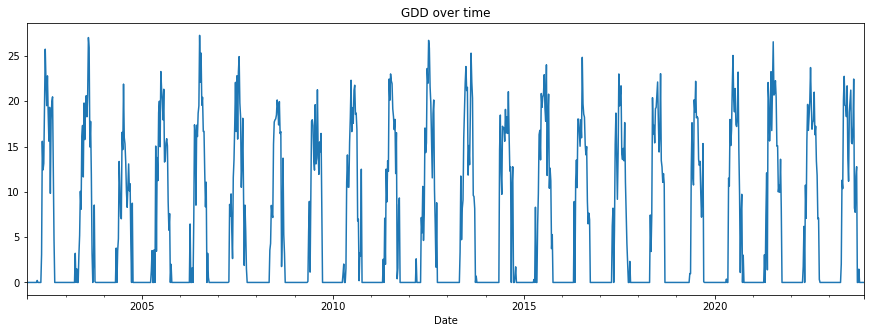

In [93]:
fig, ax = plt.subplots(figsize=(15, 5))
df_num["GDD"].plot(ax=ax)
ax.set_title("GDD over time");

In [94]:
dftest = adfuller(df_num["MaxTemp"])

In [95]:
print ('Results of Dickey-Fuller Test on MaxTemp:')

dfoutput = pd.Series(dftest[0:4],
                     index=['Test Statistic', 'p-value', '#Lags Used',
                            'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test on MaxTemp:
Test Statistic                -1.517332e+01
p-value                        6.345724e-28
#Lags Used                     2.200000e+01
Number of Observations Used    1.122000e+03
Critical Value (1%)           -3.436192e+00
Critical Value (5%)           -2.864119e+00
Critical Value (10%)          -2.568143e+00
dtype: float64


In [96]:
dftest = adfuller(df_num["MinTemp"])

In [97]:
print ('Results of Dickey-Fuller Test on MinTemp:')

dfoutput = pd.Series(dftest[0:4],
                     index=['Test Statistic', 'p-value', '#Lags Used',
                            'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test on MinTemp:
Test Statistic                -1.520512e+01
p-value                        5.756984e-28
#Lags Used                     2.300000e+01
Number of Observations Used    1.121000e+03
Critical Value (1%)           -3.436197e+00
Critical Value (5%)           -2.864122e+00
Critical Value (10%)          -2.568145e+00
dtype: float64


In [98]:
dftest = adfuller(df_num["GDD"])

In [99]:
print ('Results of Dickey-Fuller Test on GDD:')

dfoutput = pd.Series(dftest[0:4],
                     index=['Test Statistic', 'p-value', '#Lags Used',
                            'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test on GDD:
Test Statistic                -1.098280e+01
p-value                        7.385757e-20
#Lags Used                     2.300000e+01
Number of Observations Used    1.121000e+03
Critical Value (1%)           -3.436197e+00
Critical Value (5%)           -2.864122e+00
Critical Value (10%)          -2.568145e+00
dtype: float64


## Max Temps

In [100]:
df_max = df_num["MaxTemp"]

In [101]:
cutoff = round(df_max.shape[0]*0.8)
cutoff

916

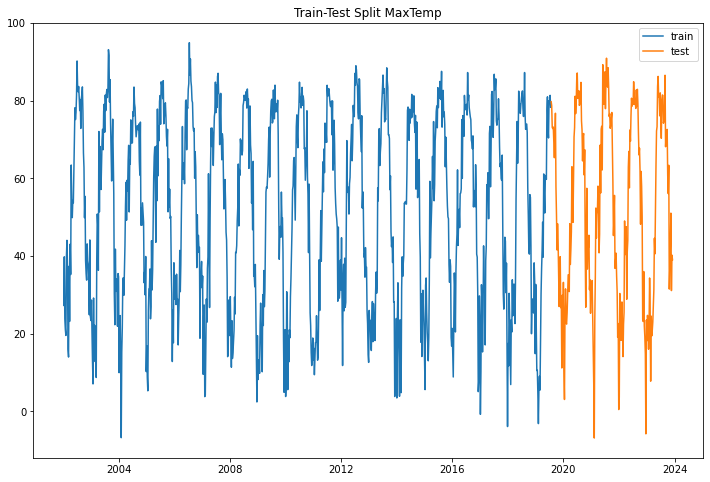

In [102]:
trainM = df_max[:cutoff]

testM = df_max[cutoff:]

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(trainM, label='train')
ax.plot(testM, label='test')
ax.set_title('Train-Test Split MaxTemp');
plt.legend();

In [103]:
trainM

Date
2002-01-01    27.303
2002-01-08    39.815
2002-01-15    23.837
2002-01-22    21.085
2002-01-29    19.566
               ...  
2019-06-18    70.417
2019-06-25    80.034
2019-07-02    79.628
2019-07-09    81.387
2019-07-16    78.324
Name: MaxTemp, Length: 916, dtype: float64

In [104]:
naiveM = trainM.shift(1)
naiveM

Date
2002-01-01       NaN
2002-01-08    27.303
2002-01-15    39.815
2002-01-22    23.837
2002-01-29    21.085
               ...  
2019-06-18    72.868
2019-06-25    70.417
2019-07-02    80.034
2019-07-09    79.628
2019-07-16    81.387
Name: MaxTemp, Length: 916, dtype: float64

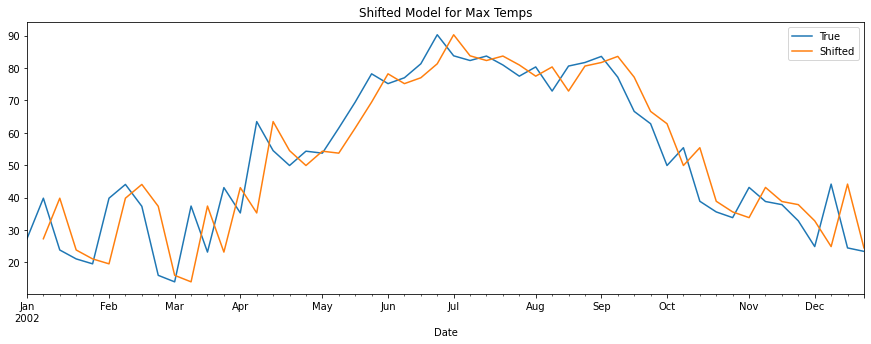

In [257]:
fig, ax = plt.subplots(figsize=(15, 5))

trainM[0:52].plot(ax=ax, label='True')
naiveM[0:52].plot(ax=ax, label='Shifted')
ax.set_title('Shifted Model for Max Temps')
ax.legend();

In [106]:
np.sqrt(mean_squared_error(trainM[1:], naiveM.dropna()))

9.942815983950943

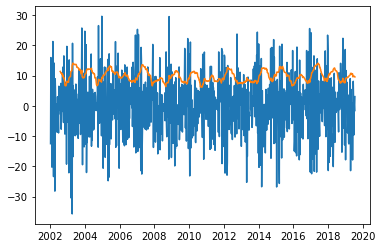

In [107]:
fig, ax = plt.subplots()
residuals = naiveM[1:] - trainM[1:]
ax.plot(residuals.index, residuals)
ax.plot(residuals.index, residuals.rolling(30).std());

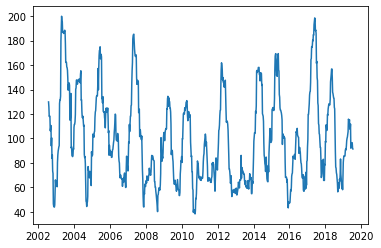

In [108]:
fig, ax = plt.subplots()

ax.plot(residuals.index, residuals.rolling(30).var());

In [109]:
p_val = adfuller(trainM.diff()[1:])[1]
print(f"The p-value associated with the Dickey-Fuller statistical test is {p_val},")
if p_val < 0.05:
    print(" so we can safely assume that the differenced data is stationary.")
else:
    print(" so we cannot reject the null hypothesis that the differenced data is \
not stationary.")

The p-value associated with the Dickey-Fuller statistical test is 1.5214898068086198e-17,
 so we can safely assume that the differenced data is stationary.


## Min Temps

In [110]:
df_min = df_num["MinTemp"]

In [111]:
cutoff = round(df_min.shape[0]*0.8)
cutoff

916

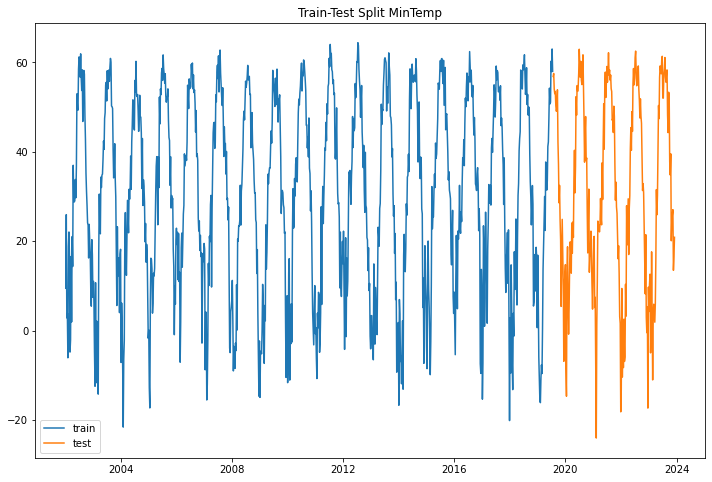

In [112]:
trainm = df_min[:cutoff]

testm = df_min[cutoff:]

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(trainm, label='train')
ax.plot(testm, label='test')
ax.set_title('Train-Test Split MinTemp');
plt.legend();

In [113]:
trainm

Date
2002-01-01     9.467
2002-01-08    25.948
2002-01-15     2.848
2002-01-22     3.847
2002-01-29    -6.088
               ...  
2019-06-18    51.093
2019-06-25    60.288
2019-07-02    57.964
2019-07-09    63.014
2019-07-16    58.005
Name: MinTemp, Length: 916, dtype: float64

In [114]:
naivem = trainm.shift(1)
naivem

Date
2002-01-01       NaN
2002-01-08     9.467
2002-01-15    25.948
2002-01-22     2.848
2002-01-29     3.847
               ...  
2019-06-18    50.718
2019-06-25    51.093
2019-07-02    60.288
2019-07-09    57.964
2019-07-16    63.014
Name: MinTemp, Length: 916, dtype: float64

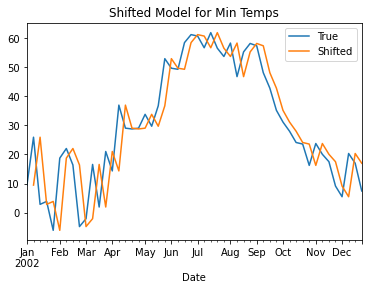

In [249]:
fig, ax = plt.subplots()

trainm[0:52].plot(ax=ax, label='True')
naivem[0:52].plot(ax=ax, label='Shifted')
ax.set_title('Shifted Model for Min Temps')
ax.legend();

In [116]:
np.sqrt(mean_squared_error(trainm[1:], naivem.dropna()))

8.550515831561997

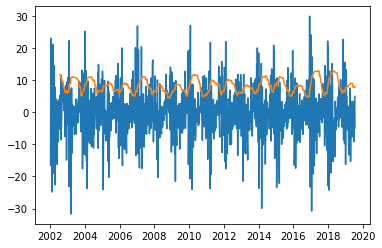

In [117]:
fig, ax = plt.subplots()
residuals = naivem[1:] - trainm[1:]
ax.plot(residuals.index, residuals)
ax.plot(residuals.index, residuals.rolling(30).std());

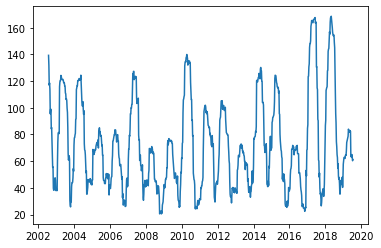

In [118]:
fig, ax = plt.subplots()

ax.plot(residuals.index, residuals.rolling(30).var());

In [119]:
p_val = adfuller(trainm.diff()[1:])[1]
print(f"The p-value associated with the Dickey-Fuller statistical test is {p_val},")
if p_val < 0.05:
    print(" so we can safely assume that the differenced data is stationary.")
else:
    print(" so we cannot reject the null hypothesis that the differenced data is \
not stationary.")

The p-value associated with the Dickey-Fuller statistical test is 2.96622227361988e-19,
 so we can safely assume that the differenced data is stationary.


## Models

### Max Temps

In [164]:

import warnings
warnings.filterwarnings("ignore")

In [161]:
ar_1 = ARIMA(trainM, order=(1, 1, 0)).fit()

# We put a typ='levels' to convert our predictions to remove the differencing performed.
predM = ar_1.predict(typ='levels')
predM

2002-01-01     0.000000
2002-01-08    27.302374
2002-01-15    36.910940
2002-01-22    27.545526
2002-01-29    21.723745
                ...    
2019-06-18    74.756846
2019-06-25    70.985882
2019-07-02    77.801875
2019-07-09    79.722233
2019-07-16    80.978733
Freq: W-TUE, Name: predicted_mean, Length: 916, dtype: float64

In [122]:
ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                MaxTemp   No. Observations:                  916
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -3374.636
Date:                Wed, 27 Dec 2023   AIC                           6753.273
Time:                        14:27:38   BIC                           6762.911
Sample:                    01-01-2002   HQIC                          6756.951
                         - 07-16-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2321      0.030     -7.827      0.000      -0.290      -0.174
sigma2        93.4769      4.076     22.935      0.000      85.489     101.465
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):                 3.60
Prob(Q):                              0.63   Prob(JB):                         0.16
Heteroskedasticity (H):               1.00   Skew:                            -0.02
Prob(H) (two-sided):                  1.00   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [123]:
ar_1.aic

6753.272655815688

In [124]:
df_max

Date
2002-01-01    27.303
2002-01-08    39.815
2002-01-15    23.837
2002-01-22    21.085
2002-01-29    19.566
               ...  
2023-11-07    42.588
2023-11-14    51.062
2023-11-21    31.120
2023-11-28    40.252
2023-12-05    39.090
Name: MaxTemp, Length: 1145, dtype: float64

In [125]:
random_walk_model = ARIMA(trainM, order=(0, 1, 0)).fit()
random_walk_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                MaxTemp   No. Observations:                  916
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -3399.947
Date:                Wed, 27 Dec 2023   AIC                           6801.894
Time:                        14:27:38   BIC                           6806.712
Sample:                    01-01-2002   HQIC                          6803.733
                         - 07-16-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        98.8614      4.364     22.656      0.000      90.309     107.414
===================================================================================
Ljung-Box (L1) (Q):                  49.38   Jarque-Bera (JB):                 2.48
Prob(Q):                              0.00   Prob(JB):                         0.29
Heteroskedasticity (H):               0.93   Skew:                             0.04
Prob(H) (two-sided):                  0.54   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [126]:
print(f'Random Walk AIC: {random_walk_model.aic}')
print(f'AR(1, 1, 0) AIC: {ar_1.aic}' )

Random Walk AIC: 6801.893526002308
AR(1, 1, 0) AIC: 6753.272655815688


In [127]:
y_hat_ar1 = ar_1.predict(typ='levels')
np.sqrt(mean_squared_error(trainM, y_hat_ar1))

9.70845588186598

In [128]:
y_hat_rw = random_walk_model.predict(typ='levels')
np.sqrt(mean_squared_error(trainM, y_hat_rw))

9.978250276296901

### Min Temps 

In [129]:
ar_1 = ARIMA(trainm, order=(1, 1, 0)).fit()

# We put a typ='levels' to convert our predictions to remove the differencing performed.
predm = ar_1.predict(typ='levels')
predm

2002-01-01     0.000000
2002-01-08     9.466860
2002-01-15    22.620724
2002-01-22     7.511556
2002-01-29     3.645316
                ...    
2019-06-18    51.430050
2019-06-25    51.017293
2019-07-02    58.431662
2019-07-09    58.433182
2019-07-16    61.994478
Freq: W-TUE, Name: predicted_mean, Length: 916, dtype: float64

In [130]:
ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                MinTemp   No. Observations:                  916
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -3242.937
Date:                Wed, 27 Dec 2023   AIC                           6489.874
Time:                        14:27:38   BIC                           6499.512
Sample:                    01-01-2002   HQIC                          6493.553
                         - 07-16-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2019      0.029     -7.069      0.000      -0.258      -0.146
sigma2        70.1382      2.642     26.544      0.000      64.959      75.317
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                45.82
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                             0.10
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [131]:
ar_1.aic

6489.87435129155

In [132]:
df_min

Date
2002-01-01     9.467
2002-01-08    25.948
2002-01-15     2.848
2002-01-22     3.847
2002-01-29    -6.088
               ...  
2023-11-07    25.911
2023-11-14    27.059
2023-11-21    13.487
2023-11-28    16.536
2023-12-05    20.880
Name: MinTemp, Length: 1145, dtype: float64

In [133]:
random_walk_model = ARIMA(trainm, order=(0, 1, 0)).fit()
random_walk_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                MinTemp   No. Observations:                  916
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -3261.911
Date:                Wed, 27 Dec 2023   AIC                           6525.822
Time:                        14:27:38   BIC                           6530.641
Sample:                    01-01-2002   HQIC                          6527.662
                         - 07-16-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        73.1131      2.757     26.518      0.000      67.709      78.517
===================================================================================
Ljung-Box (L1) (Q):                  37.18   Jarque-Bera (JB):                47.67
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                             0.16
Prob(H) (two-sided):                  0.69   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [134]:
print(f'Random Walk AIC: {random_walk_model.aic}')
print(f'AR(1, 1, 0) AIC: {ar_1.aic}' )

Random Walk AIC: 6525.822166562339
AR(1, 1, 0) AIC: 6489.87435129155


In [135]:
y_hat_ar1 = ar_1.predict(typ='levels')
np.sqrt(mean_squared_error(trainm, y_hat_ar1))

8.376834622311945

In [136]:
y_hat_rw = random_walk_model.predict(typ='levels')
np.sqrt(mean_squared_error(trainm, y_hat_rw))

8.551569915817167

## SARIMA

Because of the clear seasonality the final model we will use is a tuned SARIMA, which stands for Seasonal Auto Regressive Integrated Moving Average. The `statsmodels` package is actually called SARIMAX.  The X stands for exogenous, and we are only dealing with endogenous variables, but we can use this class.

A seasonal ARIMA model is classified as an **ARIMA(p,d,q)x(P,D,Q)** model, 

    **p** = number of autoregressive (AR) terms 
    **d** = number of differences 
    **q** = number of moving average (MA) terms
     
    **P** = number of seasonal autoregressive (SAR) terms 
    **D** = number of seasonal differences 
    **Q** = number of seasonal moving average (SMA) terms

I.e. P and Q specify the number of seasons to include.

In [137]:
p = q = range(0, 2)
pdq = list(itertools.product(p, [1], q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, [1], q))]
print('Examples of parameter for SARIMA...')
for i in pdq:
    for s in seasonal_pdq:
        print('SARIMAX: {} x {}'.format(i, s))

Examples of parameter for SARIMA...
SARIMAX: (0, 1, 0) x (0, 1, 0, 52)
SARIMAX: (0, 1, 0) x (0, 1, 1, 52)
SARIMAX: (0, 1, 0) x (1, 1, 0, 52)
SARIMAX: (0, 1, 0) x (1, 1, 1, 52)
SARIMAX: (0, 1, 1) x (0, 1, 0, 52)
SARIMAX: (0, 1, 1) x (0, 1, 1, 52)
SARIMAX: (0, 1, 1) x (1, 1, 0, 52)
SARIMAX: (0, 1, 1) x (1, 1, 1, 52)
SARIMAX: (1, 1, 0) x (0, 1, 0, 52)
SARIMAX: (1, 1, 0) x (0, 1, 1, 52)
SARIMAX: (1, 1, 0) x (1, 1, 0, 52)
SARIMAX: (1, 1, 0) x (1, 1, 1, 52)
SARIMAX: (1, 1, 1) x (0, 1, 0, 52)
SARIMAX: (1, 1, 1) x (0, 1, 1, 52)
SARIMAX: (1, 1, 1) x (1, 1, 0, 52)
SARIMAX: (1, 1, 1) x (1, 1, 1, 52)


In [138]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod=SARIMAX(trainM,
                         order=param,
                         seasonal_order=param_seasonal,
                         enforce_stationarity=False,
                         enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            print('Oops!')
            continue

ARIMA(0, 1, 0)x(0, 1, 0, 52) - AIC:6915.79949563192
ARIMA(0, 1, 0)x(0, 1, 1, 52) - AIC:6059.480649493349
ARIMA(0, 1, 0)x(1, 1, 0, 52) - AIC:6314.794714591788
ARIMA(0, 1, 0)x(1, 1, 1, 52) - AIC:6061.474139352555
ARIMA(0, 1, 1)x(0, 1, 0, 52) - AIC:6667.389827353952
ARIMA(0, 1, 1)x(0, 1, 1, 52) - AIC:5850.826204833576
ARIMA(0, 1, 1)x(1, 1, 0, 52) - AIC:6097.156785961899
ARIMA(0, 1, 1)x(1, 1, 1, 52) - AIC:5852.010383922166
ARIMA(1, 1, 0)x(0, 1, 0, 52) - AIC:6812.7406694332685
ARIMA(1, 1, 0)x(0, 1, 1, 52) - AIC:5967.622056785127
ARIMA(1, 1, 0)x(1, 1, 0, 52) - AIC:6212.151917787627
ARIMA(1, 1, 0)x(1, 1, 1, 52) - AIC:5969.614530730438
ARIMA(1, 1, 1)x(0, 1, 0, 52) - AIC:6592.8472874288045
ARIMA(1, 1, 1)x(0, 1, 1, 52) - AIC:5783.170374557667
ARIMA(1, 1, 1)x(1, 1, 0, 52) - AIC:6013.905069099193
ARIMA(1, 1, 1)x(1, 1, 1, 52) - AIC:5783.676337726967


Let's try the third from the bottom, ARIMA(1, 1, 1)x(0, 1, 1, 52).

In [139]:
sari_mod =SARIMAX(trainM,
                  order=(1, 1, 1),
                  seasonal_order=(0, 1, 1, 52),
                  enforce_stationarity=False,
                  enforce_invertibility=False).fit()

In [140]:
split = TimeSeriesSplit()
train_with_ind = trainM.reset_index()

In [141]:
for train_ind, val_ind in split.split(train_with_ind):
    sarimax = SARIMAX(endog=train_with_ind.iloc[train_ind, -1],
                      order=(1, 1, 1),
                      seasonal_order=(0, 1, 1, 52),
                      enforce_stationarity=False,
                      enforce_invertibility=False).fit()
    preds = sarimax.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

9.755217189469944
9.72850591888333
9.623385864655928
8.523807824272199
11.17313040897434


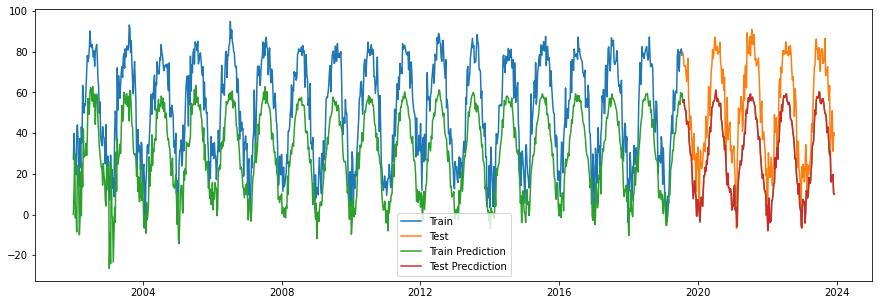

In [258]:
y_hat_trainM = sari_mod.predict(typ='levels')
y_hat_testM = sari_mod.predict(start=testM.index[0], end=testM.index[-1],typ='levels')

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(trainM, label='Train')
ax.plot(testM, label='Test')
ax.plot(y_hat_trainM, label='Train Prediction')
ax.plot(y_hat_testM, label='Test Precdiction')

plt.legend();

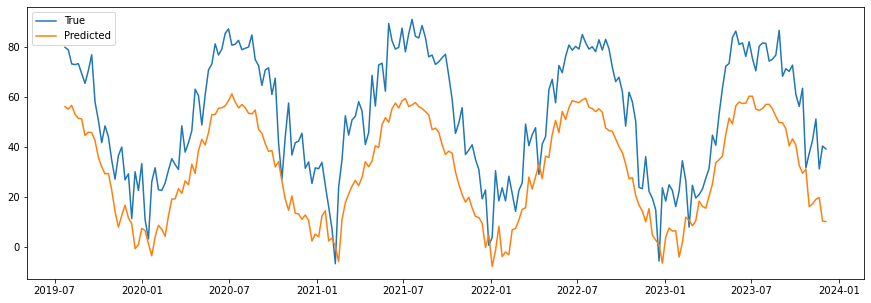

In [259]:
# Let's zoom in on test
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(testM, label='True')
ax.plot(y_hat_testM, label='Predicted')

plt.legend();

In [144]:
np.sqrt(mean_squared_error(testM, y_hat_testM))

12.300770104264517

## Forecast

### Forecast Max Temps

Lastly, let's predict into the future.

To do so, we'll refit to our entire training set.

In [145]:
sari_mod = SARIMAX(df_max,
                   order=(1, 1, 1),
                   seasonal_order=(0, 1, 1, 52),
                   enforce_stationarity=False,
                   enforce_invertibility=False).fit()

In [146]:
forecast_max = sari_mod.forecast(steps=52)

In [147]:
forecast_max = forecast_max.rename('Max_Temp')

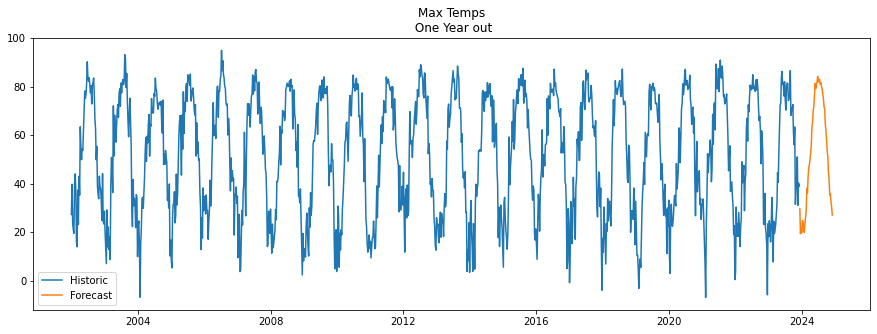

In [267]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df_max, label='Historic')
ax.plot(forecast_max, label='Forecast')
ax.set_title('Max Temps\n One Year out')

plt.legend();

In [149]:
forecast_max

2023-12-12    29.762009
2023-12-19    19.378415
2023-12-26    21.793404
2024-01-02    19.875611
2024-01-09    24.876647
2024-01-16    24.582387
2024-01-23    20.983960
2024-01-30    19.952116
2024-02-06    23.391558
2024-02-13    26.475630
2024-02-20    28.859464
2024-02-27    38.178590
2024-03-05    36.235269
2024-03-12    42.891463
2024-03-19    46.600191
2024-03-26    47.827132
2024-04-02    50.184357
2024-04-09    52.493815
2024-04-16    55.953345
2024-04-23    63.312703
2024-04-30    65.046718
2024-05-07    70.332490
2024-05-14    71.710361
2024-05-21    76.209485
2024-05-28    81.312813
2024-06-04    79.218525
2024-06-11    81.063474
2024-06-18    81.806747
2024-06-25    84.229506
2024-07-02    81.999461
2024-07-09    82.135306
2024-07-16    83.006239
2024-07-23    81.112613
2024-07-30    81.651468
2024-08-06    80.201182
2024-08-13    79.110940
2024-08-20    77.114104
2024-08-27    75.233939
2024-09-03    71.831554
2024-09-10    70.997129
2024-09-17    64.808914
2024-09-24    61

### Forecast Min Temps

In [150]:
sari_mod = SARIMAX(df_min,
                   order=(1, 1, 1),
                   seasonal_order=(0, 1, 1, 52),
                   enforce_stationarity=False,
                   enforce_invertibility=False).fit()

In [151]:
forecast_min = sari_mod.forecast(steps=52)


In [152]:
forecast_min = forecast_min.rename('Min_Temp')

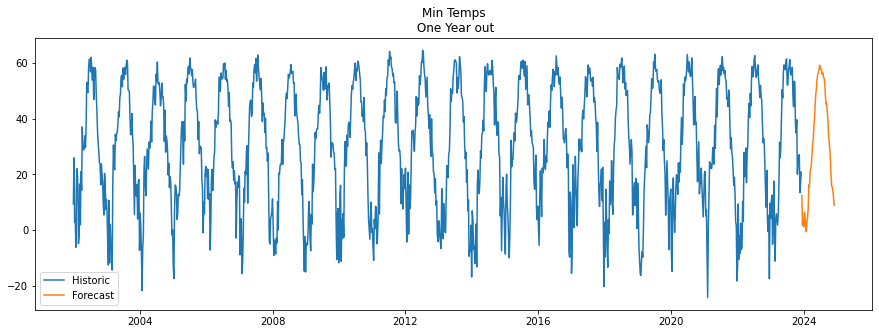

In [268]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df_min, label='Historic')
ax.plot(forecast_min, label='Forecast')
ax.set_title('Min Temps\n One Year out')

plt.legend();

In [154]:
forecast_min

2023-12-12    12.447983
2023-12-19     1.787758
2023-12-26     3.876285
2024-01-02     1.262591
2024-01-09     6.463895
2024-01-16     5.328335
2024-01-23     1.850072
2024-01-30    -0.497596
2024-02-06     2.781470
2024-02-13     4.304671
2024-02-20     8.135546
2024-02-27    16.269878
2024-03-05    15.676847
2024-03-12    20.924270
2024-03-19    22.080301
2024-03-26    23.368342
2024-04-02    27.456677
2024-04-09    30.915043
2024-04-16    32.547682
2024-04-23    37.367593
2024-04-30    40.078629
2024-05-07    45.440425
2024-05-14    48.917442
2024-05-21    50.822360
2024-05-28    54.205330
2024-06-04    55.830545
2024-06-11    56.354696
2024-06-18    57.429897
2024-06-25    59.095281
2024-07-02    58.343461
2024-07-09    57.646184
2024-07-16    57.485857
2024-07-23    55.854668
2024-07-30    56.326450
2024-08-06    54.940811
2024-08-13    54.516146
2024-08-20    52.421859
2024-08-27    48.385105
2024-09-03    45.110522
2024-09-10    45.495389
2024-09-17    42.474610
2024-09-24    39

## GDD For 2024

In [155]:
df2024 = pd.concat ([forecast_max, forecast_min], axis=1)

In [156]:
df2024.head()

,Max_Temp,Min_Temp
2023-12-12,29.762009,12.447983
2023-12-19,19.378415,1.787758
2023-12-26,21.793404,3.876285
2024-01-02,19.875611,1.262591
2024-01-09,24.876647,6.463895


In [157]:
df2024["GDD"] = (df2024["Max_Temp"]+df2024["Min_Temp"])/2 - 50

In [158]:
df2024.head()

,Max_Temp,Min_Temp,GDD
2023-12-12,29.762009,12.447983,-28.895004
2023-12-19,19.378415,1.787758,-39.416914
2023-12-26,21.793404,3.876285,-37.165156
2024-01-02,19.875611,1.262591,-39.430899
2024-01-09,24.876647,6.463895,-34.329729


In [159]:
df2024["GDD"] = df2024["GDD"].clip(lower=0)

In [160]:
df2024.head()

,Max_Temp,Min_Temp,GDD
2023-12-12,29.762009,12.447983,0.0
2023-12-19,19.378415,1.787758,0.0
2023-12-26,21.793404,3.876285,0.0
2024-01-02,19.875611,1.262591,0.0
2024-01-09,24.876647,6.463895,0.0


In [181]:
df2024.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52 entries, 2023-12-12 to 2024-12-03
Freq: W-TUE
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Max_Temp  52 non-null     float64
 1   Min_Temp  52 non-null     float64
 2   GDD       52 non-null     float64
dtypes: float64(3)
memory usage: 4.1 KB


## Comparing GDD with Predicted GDD

In [227]:
d=[]
years = [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
for yr in years:
    d.append(
        {
            "Year": yr,
            "GDD": round(df_num["GDD"].loc[df_num.index.year==yr].sum(), 0)
        }
    )

In [228]:
d.append(
        {
            "Year": 2024,
            "GDD": round(df2024["GDD"].loc[df2024.index.year==2024].sum(), 0)
        }
    )

In [235]:
d=pd.DataFrame(d)
d=d.set_index("Year")

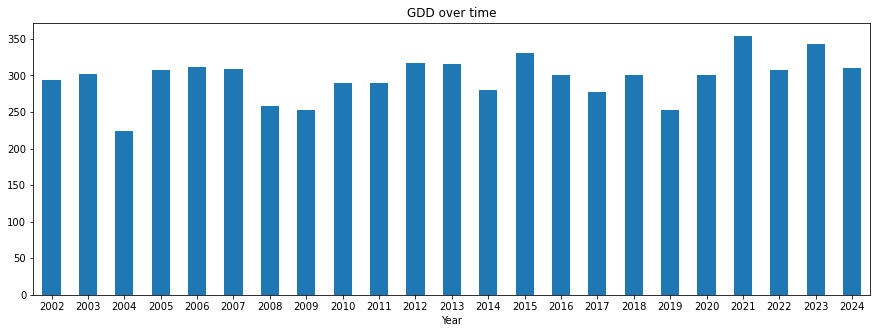

In [270]:
fig, ax = plt.subplots(figsize=(15, 5))
d.plot.bar(ax=ax, rot=0, legend=False)
ax.set_title("GDD over time");